In [1]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns
train,test = pd.read_csv('Train.csv'),pd.read_csv('Test.csv')

In [2]:
train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


In [3]:
train.Year = train.Year.str.replace(',','')
train.Year = train.Year.astype(float)
train.Distance  = train.Distance.str.replace(',','')
train.Distance = train.Distance.astype(float)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7184 non-null   float64
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    7008 non-null   object 
 8   Distance                4845 non-null   float64
dtypes: float64(3), object(6)
memory usage: 506.7+ KB


In [5]:
train.Distance.fillna(-999, inplace=True)
train.Year.fillna(2011.0, inplace = True)
train['Amount (Million Naira)'].fillna(train['Amount (Million Naira)'].median() , inplace = True)

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   VehicleID  2061 non-null   object 
 1   Location   2061 non-null   object 
 2   Maker      2061 non-null   object 
 3   Model      2061 non-null   object 
 4   Year       2059 non-null   object 
 5   Colour     2061 non-null   object 
 6   Type       2007 non-null   object 
 7   Distance   1385 non-null   float64
dtypes: float64(1), object(7)
memory usage: 128.9+ KB


In [7]:
test.Year = test.Year.str.replace(',','')

In [8]:
test.Year = test.Year.astype(float)

In [9]:
test.Year.fillna(2011.0, inplace=True)
test.Distance.fillna(-999, inplace=True)
test.Year = test.Year.astype(int)
test.Distance = test.Distance.astype(int)

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   VehicleID  2061 non-null   object
 1   Location   2061 non-null   object
 2   Maker      2061 non-null   object
 3   Model      2061 non-null   object
 4   Year       2061 non-null   int32 
 5   Colour     2061 non-null   object
 6   Type       2007 non-null   object
 7   Distance   2061 non-null   int32 
dtypes: int32(2), object(6)
memory usage: 112.8+ KB


In [11]:
train.Type.fillna('Foreign Used', inplace=True)
test.Type.fillna('Foreign Used', inplace=True)

In [12]:
train.isna().sum()

VehicleID                 0
Location                  0
Maker                     0
Model                     0
Year                      0
Colour                    0
Amount (Million Naira)    0
Type                      0
Distance                  0
dtype: int64

In [13]:
test.isna().sum()

VehicleID    0
Location     0
Maker        0
Model        0
Year         0
Colour       0
Type         0
Distance     0
dtype: int64

In [14]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import HistGradientBoostingRegressor


In [15]:
cat_cols = train.select_dtypes(include = 'object').columns
num_cols = train.select_dtypes(exclude = 'object').columns

In [16]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder , StandardScaler

lb_Model  = LabelEncoder()
train.Model = lb_Model.fit_transform(train.Model)

lb_Colour = LabelEncoder()
train.Colour = lb_Colour.fit_transform(train.Colour)

lb_Maker = LabelEncoder()
train.Maker = lb_Maker.fit_transform(train.Maker)


In [17]:
train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,17,117,2011.0,16,2.2,Nigerian Used,-999.0
1,VHL18827,Ibadan,19,1049,2012.0,16,3.5,Nigerian Used,125000.0
2,VHL19499,Lagos,29,908,2010.0,15,9.2,Foreign Used,110852.0
3,VHL17991,Abuja,34,508,2017.0,2,22.8,Foreign Used,30000.0
4,VHL12170,Ibadan,52,569,2002.0,15,2.6,Nigerian Used,125206.0


In [18]:
train['Amount (Million Naira)'].dtype

dtype('float64')

In [19]:
train['Amount (Million Naira)'] = train['Amount (Million Naira)'].astype(float)
train.corr()['Amount (Million Naira)']

Maker                    -0.048018
Model                     0.085127
Year                      0.452479
Colour                   -0.040683
Amount (Million Naira)    1.000000
Distance                 -0.147345
Name: Amount (Million Naira), dtype: float64

In [21]:
train = pd.get_dummies(train, columns = ['Location', 'Type'], prefix = '' , prefix_sep = '')

In [23]:
train.head()

,VehicleID,Maker,Model,Year,Colour,Amount (Million Naira),Distance,Abuja,Ibadan,Lagos,Brand New,Foreign Used,Nigerian Used
0,VHL12546,17,117,2011.0,16,2.2,-999.0,1,0,0,0,0,1
1,VHL18827,19,1049,2012.0,16,3.5,125000.0,0,1,0,0,0,1
2,VHL19499,29,908,2010.0,15,9.2,110852.0,0,0,1,0,1,0
3,VHL17991,34,508,2017.0,2,22.8,30000.0,1,0,0,0,1,0
4,VHL12170,52,569,2002.0,15,2.6,125206.0,0,1,0,0,0,1


<AxesSubplot:xlabel='Distance'>

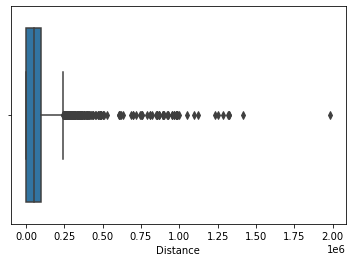

In [24]:
sns.boxplot(data = train, x = 'Distance')

<AxesSubplot:xlabel='Amount (Million Naira)'>

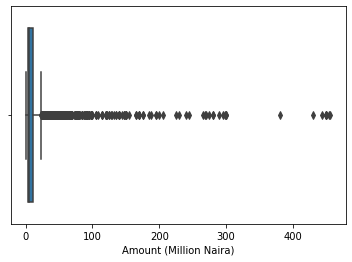

In [25]:
sns.boxplot(data = train, x = 'Amount (Million Naira)')

TODO: Try standardizing the numeric columns in the  data and see whether the results will be better

In [27]:
X = train.drop(columns  = ['Amount (Million Naira)', 'VehicleID'])
y = train['Amount (Million Naira)']

In [20]:
from sklearn.metrics import mean_squared_error



X_train, X_valid, y_train, y_valid = train_test_split(random_state = 0)

model_to_use = {
    'linreg': LinearRegression(),
    'ridge': Ridge(),
    'lasso': Lasso(),
    'gbdt': HistGradientBoostingRegressor(random_state =  0),
}


rmse = lambda x: mean_squared_error(y_valid, x, squared=False)

for name, est in models_to_use.items():
    print(f'Training With {name} model')
    est.fit(X_train, y_train)
    est.predict()